In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import HTML

import thicket as th
from thicket.model_extrap import ExtrapInterface

display(HTML("<style>.container { width:80% !important; }</style>"))

# display all columns from pandas data frames
pd.options.display.max_columns = None

data = "../../data/LULESH/exclusive/weak"
thicket = th.Thicket.from_caliperreader(data)


<IPython.core.display.Javascript object>

In [2]:
#thicket.metadata

In [3]:
extrap_interface = ExtrapInterface()

In [4]:
extrap_interface.print_modelers()

Available Extra-P Modeler: ['default', 'basic', 'refining', 'multi-parameter']


In [5]:
extrap_interface.print_modeler_options("default")

Modeler Options
--------------
allow_log_terms	 BOOL	 Allows models with logarithmic terms
use_crossvalidation	 BOOL	 Enables cross-validation
compare_with_RSS	 BOOL	 If enabled the models are compared using their residual sum of squares (RSS) instead of their symmetric mean absolute percentage error (SMAPE)
poly_exponents	 STR	 Set of polynomial exponents. Use comma separated list.
log_exponents	 STR	 Set of logarithmic exponents. Use comma separated list.
retain_default_exponents	 BOOL	 If set the default exponents are added to the given ones.
force_combination_exponents	 BOOL	 If set the exact combination of exponents is forced.
allow_negative_exponents	 BOOL	 If set adds neagtive exponents for strong scaling.



In [6]:
extrap_interface = ExtrapInterface()

modeler_options = {'allow_log_terms': True,
                   'use_crossvalidation': True,
                   'compare_with_RSS': False,
                   'poly_exponents': "0,1,2,3,4,5",
                   'log_exponents': "0,1,2",
                  }

extrap_interface.create_models(thicket, 
                               parameters=[
                                   "jobsize",
                                   #"problem_size"
                                ], 
                               metrics=[
                                   #"Avg time/rank (exc)",
                                   "Avg time/rank"
                                   ], 
                               use_median=True,
                               modeler="default",
                               model_name="config1")

extrap_interface.create_models(thicket, 
                               parameters=[
                                   "jobsize",
                                ], 
                               metrics=[
                                   "Avg time/rank (exc)",
                                   "Avg time/rank"
                                   ], 
                               modeler="default",
                               model_name="config2",
                               modeler_options=modeler_options)
"""
extrap_interface.create_models(thicket, 
                               parameters=[
                                   "problem_size"
                                ], 
                               metrics=[
                                   "Avg time/rank",
                                   "Avg time/rank (exc)",
                                   ], 
                               add_stats = False,
                               use_median=False,
                               modeler="refining",
                               model_name="config3")"""



/usr/WS2/ritter5/thicket/thicket/model_extrap.py:1256: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$-1.039\times10^{−3}+4.453\times10^{−4}\cdot \log_2{p}^{1}$' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tht.statsframe.dataframe.at[


(Callpath(CommSBN), Metric(Avg time/rank))


/usr/WS2/ritter5/thicket/thicket/model_extrap.py:1256: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$-1.039\times10^{−3}+4.453\times10^{−4}\cdot \log_2{p}^{1}$' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tht.statsframe.dataframe.at[
/usr/WS2/ritter5/thicket/thicket/model_extrap.py:1256: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$-1.039\times10^{−3}+4.453\times10^{−4}\cdot \log_2{p}^{1}$' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tht.statsframe.dataframe.at[


(Callpath(CommSBN), Metric(Avg time/rank (exc)))
(Callpath(CommSBN), Metric(Avg time/rank))


'\nextrap_interface.create_models(thicket, \n                               parameters=[\n                                   "problem_size"\n                                ], \n                               metrics=[\n                                   "Avg time/rank",\n                                   "Avg time/rank (exc)",\n                                   ], \n                               add_stats = False,\n                               use_median=False,\n                               modeler="refining",\n                               model_name="config3")'

In [7]:
pd.set_option('display.max_colwidth', None)
thicket.statsframe.dataframe

config1  \
                                                                                            name   
node                                                                                               
{'name': 'MPI_Barrier', 'type': 'function'}                                          MPI_Barrier   
{'name': 'MPI_Comm_dup', 'type': 'function'}                                        MPI_Comm_dup   
{'name': 'MPI_Finalize', 'type': 'function'}                                        MPI_Finalize   
{'name': 'MPI_Finalized', 'type': 'function'}                                      MPI_Finalized   
{'name': 'MPI_Initialized', 'type': 'function'}                                  MPI_Initialized   
{'name': 'main', 'type': 'function'}                                                        main   
{'name': 'CommRecv', 'type': 'function'}                                                CommRecv   
{'name': 'MPI_Irecv', 'type': 'function'}                                              MPI_Irecv   
{'name': 'CommSend', 'type': 'function'}                                                CommSend   
{'name': 'MPI_Isend', 'type': 'function'}                                              MPI_Isend   
{'name': 'MPI_Waitall', 'type': 'function'}                                          MPI_Waitall   
{'name': 'MPI_Barrier', 'type': 'function'}                                          MPI_Barrier   
{'name': 'MPI_Reduce', 'type': 'function'}                                            MPI_Reduce   
{'name': 'lulesh.cycle', 'type': 'function'}                                        lulesh.cycle   
{'name': 'LagrangeLeapFrog', 'type': 'function'}                                LagrangeLeapFrog   
{'name': 'CalcTimeConstraintsForElems', 'type': 'function'}          CalcTimeConstraintsForElems   
{'name': 'LagrangeElements', 'type': 'function'}                                LagrangeElements   
{'name': 'ApplyMaterialPropertiesForElems', 'type': 'function'}  ApplyMaterialPropertiesForElems   
{'name': 'EvalEOSForElems', 'type': 'function'}                                  EvalEOSForElems   
{'name': 'CalcEnergyForElems', 'type': 'function'}                            CalcEnergyForElems   
{'name': 'CalcLagrangeElements', 'type': 'function'}                        CalcLagrangeElements   
{'name': 'CalcKinematicsForElems', 'type': 'function'}                    CalcKinematicsForElems   
{'name': 'CalcQForElems', 'type': 'function'}                                      CalcQForElems   
{'name': 'CalcMonotonicQForElems', 'type': 'function'}                    CalcMonotonicQForElems   
{'name': 'CommMonoQ', 'type': 'function'}                                              CommMonoQ   
{'name': 'MPI_Wait', 'type': 'function'}                                                MPI_Wait   
{'name': 'CommRecv', 'type': 'function'}                                                CommRecv   
{'name': 'MPI_Irecv', 'type': 'function'}                                              MPI_Irecv   
{'name': 'CommSend', 'type': 'function'}                                                CommSend   
{'name': 'MPI_Isend', 'type': 'function'}                                              MPI_Isend   
{'name': 'MPI_Waitall', 'type': 'function'}                                          MPI_Waitall   
{'name': 'LagrangeNodal', 'type': 'function'}                                      LagrangeNodal   
{'name': 'CalcForceForNodes', 'type': 'function'}                              CalcForceForNodes   
{'name': 'CalcVolumeForceForElems', 'type': 'function'}                  CalcVolumeForceForElems   
{'name': 'CalcHourglassControlForElems', 'type': 'function'}        CalcHourglassControlForElems   
{'name': 'CalcFBHourglassForceForElems', 'type': 'function'}        CalcFBHourglassForceForElems   
{'name': 'IntegrateStressForElems', 'type': 'function'}                  IntegrateStressForElems   
{'name': 'CommRecv', 'type': 'function'}                                                C

In [8]:
thicket.statsframe.dataframe["config1"]

,name,Avg time/rank_extrap-model,Avg time/rank_RSS_extrap-model,Avg time/rank_rRSS_extrap-model,Avg time/rank_SMAPE_extrap-model,Avg time/rank_AR2_extrap-model,Avg time/rank_RE_extrap-model
node,,,,,,,
"{'name': 'MPI_Barrier', 'type': 'function'}",MPI_Barrier,$-1.039\times10^{−3}+4.453\times10^{−4}\cdot \log_2{p}^{1}$,1.447227e-06,8.545707,48.405904,0.617853,0.685289
"{'name': 'MPI_Comm_dup', 'type': 'function'}",MPI_Comm_dup,$2.033\times10^{−5}+1.605\times10^{−7}\cdot p^{1/2}\cdot \log_2{p}^{2}$,5.055366e-08,8.842384,69.719797,-0.113187,0.837009
"{'name': 'MPI_Finalize', 'type': 'function'}",MPI_Finalize,$10^{−6}$,0.000000e+00,0.000000,0.000000,1.000000,0.000000
"{'name': 'MPI_Finalized', 'type': 'function'}",MPI_Finalized,$10^{−6}$,0.000000e+00,0.000000,0.000000,1.000000,0.000000
"{'name': 'MPI_Initialized', 'type': 'function'}",MPI_Initialized,$1.833\times10^{−6}$,8.333333e-13,0.729167,17.050298,1.000000,0.083333
"{'name': 'main', 'type': 'function'}",main,$-1.602\times10^{2}+1.183\times10^{2}\cdot p^{1/4}$,1.135749e+03,0.739523,17.286689,0.978938,0.183343
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,$-3.612\times10^{−3}+2.535\times10^{−3}\cdot p^{1/4}\cdot \log_2{p}^{1}$,3.196472e-07,0.002479,1.291858,0.999909,0.010951
"{'name': 'MPI_Irecv', 'type': 'function'}",MPI_Irecv,$-1.201\times10^{−2}+8.223\times10^{−3}\cdot p^{1/3}$,1.678652e-06,0.003539,2.657153,0.998228,0.021927
"{'name': 'CommSend', 'type': 'function'}",CommSend,$-1.942\times10^{−2}+5.452\times10^{−3}\cdot p^{1/4}\cdot \log_2{p}^{2}$,3.910463e-01,1.284591,34.430422,0.759871,0.341146


In [9]:
thicket.statsframe.dataframe["config1"]["Avg time/rank_extrap-model"].iloc[0].mdl.hypothesis.function

Function(-0.001039108240400175+0.00044530372518938573*log2(p)**(1))

<Figure size 432x288 with 0 Axes>

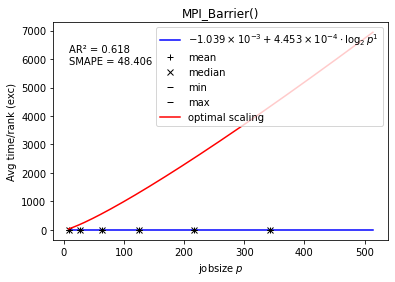

In [10]:
model_obj = thicket.statsframe.dataframe["config2"].at[thicket.statsframe.dataframe.index[0], "Avg time/rank (exc)_extrap-model"]

plt.clf()
fig, ax = model_obj.display(show_mean=True, show_median=True, 
                            show_min_max=True, 
                            AR2=True, SMAPE=True, show_opt_scaling=True,
                            opt_scaling_func="1.5*p**1*log2(p)**1")
 
# Plot graph
plt.show()


In [11]:
with pd.option_context("display.max_colwidth", 1):
    display(HTML(extrap_interface.to_html(thicket, show_mean=True, show_median=True, 
                            show_min_max=True, RSS=True, 
                            AR2=True, show_opt_scaling=False)))


In [ ]:
mdl.componentize_statsframe()

xp_comp_df = t_ens.statsframe.dataframe

xp_comp_df

In [ ]:
#mdl.complexity_statsframe(eval_targets=[[512,70],[1024,80]])
mdl.complexity_statsframe(eval_targets=[[512],[1024]])

xp_comp_df = t_ens.statsframe.dataframe

xp_comp_df

In [ ]:
# sort by growth rank to identify bottlenecks
#x = xp_comp_df.sort_values(by=["Avg time/rank (exc)_extrap-model_complexity_(512,70)"])
x = xp_comp_df.sort_values(by=["Avg time/rank (exc)_extrap-model_complexity_(512)"])
x

In [ ]:
#x = xp_comp_df.groupby("Avg time/rank (exc)_extrap-model_complexity_(512,70)")
x = xp_comp_df.groupby("Avg time/rank (exc)_extrap-model_complexity_(512)")
for key, value in x.groups.items():
    print(key)
    print(value)
